In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn import metrics

import pandas as pd
import numpy as np

#Data Visualization:
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
df = pd.read_csv(url)
#df.head()

Pre-Processing

In [2]:
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
  return x.map({'yes' : 1, 'no' : 0})

df[variable_list] = df[variable_list].apply(binary_map)
df = df.drop('furnishingstatus', axis=1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(df)

np.random.seed(0)
y = df.pop('price')

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)
#df.head()

Linear SVR without PCA

In [3]:
from sklearn.svm import SVR
classifier = SVR(kernel='linear')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

Plotting



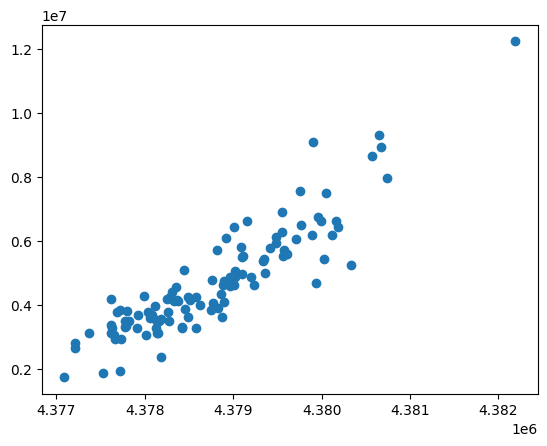

In [4]:
plt.scatter(y_pred, y_test)

In [5]:
# Define kernel-specific training functions
def linear_svm(x_train, y_train, C=1):
    classifier = SVR(kernel='linear', C=C)
    classifier.fit(x_train, y_train)
    return classifier

def poly_svm(x_train, y_train, degree=2, C=1):
    classifier = SVR(kernel='poly', degree=degree, C=C)
    classifier.fit(x_train, y_train)
    return classifier

def rbf_svm(x_train, y_train, C=1, gamma='scale'):
    classifier = SVR(kernel='rbf', C=C, gamma=gamma)
    classifier.fit(x_train, y_train)
    return classifier

In [6]:
def svm_train(x, y, kern, K):
  accuracies = []
  accuracy = 0
  low = float('inf')

  for N in K:
    pca = PCA(n_components=N)
    principalDf = pd.DataFrame(pca.fit_transform(x))
    newX = principalDf.values

    x_train, x_test, y_train, y_test = train_test_split(newX, y, train_size=0.8, test_size=0.2, random_state=0)

    if kern == 'linear':
            classifier = linear_svm(x_train, y_train)
    elif kern == 'poly':
            classifier = poly_svm(x_train, y_train)
    elif kern == 'rbf':
            classifier = rbf_svm(x_train, y_train)

    y_pred = classifier.predict(x_test)
    accuracy = mean_squared_error(y_test, y_pred)
    accuracies.append(accuracy)

    if accuracy < low:
      low = accuracy
      optimal_k = N

  return accuracies, low, optimal_k


Linear Kernal Accurcies [2035880430382.9973, 2035486354671.6863, 2035478171396.2708, 2035488965531.5393, 2035430597469.1584, 2035427065709.2942, 2035428448010.0647, 2035424780908.5908, 2035423653525.5615, 2035421831509.1843, 2035421838460.1057] 
Optimal K: 10 
Lowest Error:  2035421831509.1843

RBF Kernal Accurcies [3000141079406.065, 3000141079434.8936, 3000141079461.471, 3000141079484.738, 3000141079483.4204, 3000141079498.18, 3000141079505.567, 3000141079511.6143, 3000141079517.2534, 3000141079523.147, 3000141079524.7793] 
Optimal K: 1 
Lowest Error:  3000141079406.065

Poly Kernal Accurcies [3000092063188.6616, 3000092063313.093, 3000092063381.5625, 3000092063421.8135, 3000092063447.6714, 3000092063465.7783, 3000092063481.9185, 3000092063494.0093, 3000092063501.035, 3000092063510.1616, 3000092063514.3267] 
Optimal K: 1 
Lowest Error:  3000092063188.6616


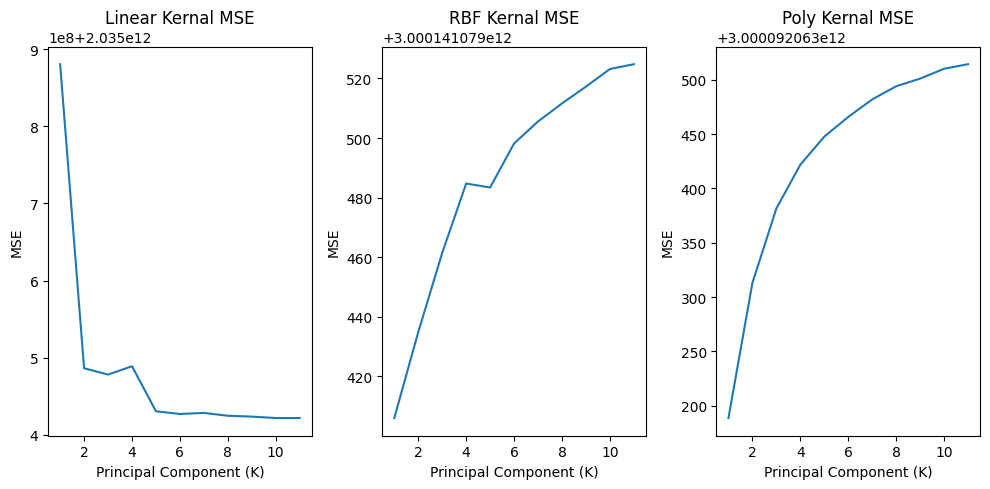

In [7]:
k = range(1, x.shape[1])
lin_accuracies, lin_low, lin_K = svm_train(df, y, 'linear', k)
rbf_accuracies, rbf_low, rbf_K = svm_train(df, y, 'rbf', k)
poly_accuracies, poly_low, poly_K = svm_train(df, y, 'poly', k)

print('Linear Kernel Accurcies', lin_accuracies, '\nOptimal K:', lin_K, '\nLowest Error: ', lin_low)
print('\nRBF Kernel Accurcies', rbf_accuracies, '\nOptimal K:', rbf_K, '\nLowest Error: ', rbf_low)
print('\nPoly Kernel Accurcies', poly_accuracies, '\nOptimal K:', poly_K, '\nLowest Error: ', poly_low)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(k, lin_accuracies)
plt.title('Linear Kernel')
plt.xlabel('Principal Component (K)')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(k, rbf_accuracies )
plt.title('RBF Kernal')
plt.xlabel('Principal Component (K)')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
plt.plot(k, poly_accuracies)
plt.title('Poly Kernel')
plt.xlabel('Principal Component (K)')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()